In [1]:
import pandas as pd 

import itertools
import subprocess
import os
import random

import pickle

In [2]:
sh_file = '/home/tbellagio/simulations/cline_creation/call_simulate_sline.sh'

In [3]:
og_path = '/home/tbellagio/simulations/cline_creation/results/'

In [4]:
# Define the parameters
parameters = {
    'og_path': ['/home/tbellagio/simulations/cline_creation/results/'],
    'final_sel_strength': [4,4,5,5],
    'migration_rate': [0.01, 0.05,0.1,0.5],
    'last_gen': [50,50,50,100, 200],
}

In [5]:
# Generate all combinations of parameters
keys, values = zip(*parameters.items())
combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]

In [6]:
# Define the directory to save the sbatch scripts
shdir = '/home/tbellagio/simulations/cline_creation/sbatch_scripts/'
# Ensure the directory exists
os.makedirs(shdir, exist_ok=True)

In [317]:
wd = '/home/tbellagio/simulations/cline_creation/'

In [318]:
# SLiM script path
slim_script = "simulate_cline.slim"

# List to hold the paths of the sh files
shfiles = []

# Create sbatch files for each parameter combination
for i, combo in enumerate(combinations):
    og_path = combo['og_path']
    final_sel_strength = combo['final_sel_strength']
    migration_rate = combo['migration_rate']
    last_gen = combo['last_gen']
    seed = random.randint(1, 100000000)
    
    # Construct the SLiM command
    cmd = f'slim -d "final_sel_strength={final_sel_strength}" -d "migration_rate={migration_rate}" -d "last_gen={last_gen}" {slim_script}'
    
    # Define the sh file name
    file = os.path.join(shdir, f'cline_sim_{i+1}.sh')
    
    # Create the sbatch script content
    text = f'''#!/bin/bash
#SBATCH --job-name=cline_sim_{i+1}
#SBATCH --time=1:00:00
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=10gb
#SBATCH --cpus-per-task=1
#SBATCH --output={og_path}/cline_sim_{i+1}_%j.out
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/pipeline_snakemake
cd {wd}
{cmd}
'''
    
    # Write the sbatch script to a file
    with open(file, 'w') as o:
        o.write(text)
    
    # Add the sh file path to the list
    shfiles.append(file)

In [319]:
len(shfiles)

80

In [280]:
#subprocess.run(["sbatch", '/home/tbellagio/simulations/cline_creation/sbatch_scripts/cline_sim_1.sh'], check=True)

In [281]:
# Submit the sh files to the SLURM scheduler
for shfile in shfiles:
    subprocess.run(["sbatch", shfile], check=True)

Submitted batch job 12032
Submitted batch job 12033
Submitted batch job 12034
Submitted batch job 12035
Submitted batch job 12036
Submitted batch job 12037
Submitted batch job 12038
Submitted batch job 12039
Submitted batch job 12040
Submitted batch job 12041
Submitted batch job 12042
Submitted batch job 12043
Submitted batch job 12044
Submitted batch job 12045
Submitted batch job 12046
Submitted batch job 12047
Submitted batch job 12048
Submitted batch job 12049
Submitted batch job 12050
Submitted batch job 12051
Submitted batch job 12052
Submitted batch job 12053
Submitted batch job 12054
Submitted batch job 12055
Submitted batch job 12056
Submitted batch job 12057
Submitted batch job 12058
Submitted batch job 12059
Submitted batch job 12060
Submitted batch job 12061
Submitted batch job 12062
Submitted batch job 12063
Submitted batch job 12064
Submitted batch job 12065
Submitted batch job 12066
Submitted batch job 12067
Submitted batch job 12068
Submitted batch job 12069
Submitted ba

In [85]:
dict_files = [i for i in os.listdir('results/') if 'run' in i]

In [86]:
all_params = {}
for i in dict_files:
    runid = i.replace('run_', '').replace('.txt', '').replace('self', '')
    if len(runid)>5: ## this are all the selfers 
        params = pd.read_csv(f'results/{i}',header=None)[0].values[0].split('_')
        all_params[runid] = params

In [297]:
runids = list(all_params.keys())
len(runids)

290

In [298]:
processed = [i.split('_')[-1].replace('.csv', '') for i in os.listdir('results/snps_w_clines/')]
left = set(runids) - set(processed)

In [299]:
#set(runids).intersection(set(processed))

In [320]:
len(left)

80

In [301]:
wd

'/home/tbellagio/simulations/cline_creation/'

In [326]:
# List to hold the paths of the sh files
shfiles = []

# Create sbatch files for each parameter combination
for i, runid in enumerate(left):
    migration_rate = all_params[runid][1]
    seed = random.randint(1, 100000000)
    # Define the sh file name
    file = os.path.join(shdir, f'process_tree_{runid}.sh')
    
    # Create the sbatch script content
    text = f'''#!/bin/bash
#SBATCH --job-name=process_tree_{runid}
#SBATCH --time=10:00:00
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=20gb
#SBATCH --cpus-per-task=1
#SBATCH --output={og_path}/process_tree_{runid}.out
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/pipeline_snakemake
cd {wd}
python process_tree.py {runid} {migration_rate}
'''
    
    # Write the sbatch script to a file
    with open(file, 'w') as o:
        o.write(text)
    
    # Add the sh file path to the list
    shfiles.append(file)

In [327]:
shfiles[0]

'/home/tbellagio/simulations/cline_creation/sbatch_scripts/process_tree_284179.sh'

In [328]:
# Submit the sh files to the SLURM scheduler
for shfile in shfiles:
    subprocess.run(["sbatch", shfile], check=True)

Submitted batch job 13792
Submitted batch job 13793
Submitted batch job 13794
Submitted batch job 13795
Submitted batch job 13796
Submitted batch job 13797
Submitted batch job 13798
Submitted batch job 13799
Submitted batch job 13800
Submitted batch job 13801
Submitted batch job 13802
Submitted batch job 13803
Submitted batch job 13804
Submitted batch job 13805
Submitted batch job 13806
Submitted batch job 13807
Submitted batch job 13808
Submitted batch job 13809
Submitted batch job 13810
Submitted batch job 13811
Submitted batch job 13812
Submitted batch job 13813
Submitted batch job 13814
Submitted batch job 13815
Submitted batch job 13816
Submitted batch job 13817
Submitted batch job 13818
Submitted batch job 13819
Submitted batch job 13820
Submitted batch job 13821
Submitted batch job 13822
Submitted batch job 13823
Submitted batch job 13824
Submitted batch job 13825
Submitted batch job 13826
Submitted batch job 13827
Submitted batch job 13828
Submitted batch job 13829
Submitted ba

In [403]:
#subprocess.run(["sbatch", '/home/tbellagio/simulations/cline_creation/sbatch_scripts/process_tree_2212.sh'], check=True)

In [101]:
## tree posprocessing 

In [ ]:
tree_files = [i for i in os.listdir('results/') if 'final.trees' in i]

In [30]:
for runid in all_params.keys():
    print(all_params[runid])
    output_slim_tree = tskit.load('results/'+ runid + "_tree_final.trees")
    for mut in output_slim_tree.tables.mutations:
        if len(mut.metadata['mutation_list']) < 1:
#            print(mut)

['0.5', '0.05', '50']
['1', '0.5', '100']
['0.5', '0.01', '100']
['1', '0.05', '200']
['0.1', '0.1', '50']
['1', '0.05', '100']
['0.1', '0.05', '100']
['0.5', '0.01', '200']
['0.1', '0.5', '200']
['0.5', '0.1', '50']
['0.1', '0.05', '50']
['0.5', '0.01', '50']
['0.1', '0.5', '100']
['0.5', '0.05', '200']
['0.1', '0.1', '100']
['0.5', '0.5', '200']
['0.5', '0.05', '100']
['0.5', '0.1', '200']
['1', '0.1', '50']
['1', '0.01', '50']
['0.5', '0.1', '100']
['0.5', '0.5', '100']
['0.1', '0.1', '200']
['0.1', '0.05', '200']
['0.1', '0.01', '50']
['1', '0.01', '200']
['1', '0.5', '50']
['0.5', '0.5', '50']
['1', '0.5', '200']
['1', '0.05', '50']
['0.1', '0.01', '100']
['1', '0.01', '100']
['0.1', '0.01', '200']
['1', '0.1', '100']
['0.1', '0.5', '50']
['1', '0.1', '200']


In [283]:
import pyslim 
import pandas as pd
import msprime
import tskit

import allel
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

mutrate = 1e-6
causal_pos = 15005
migration_rate = 0.1

# Load the .trees file
output_slim_tree = tskit.load('results/'+ runid + "_tree_final.trees")

In [90]:
all_params['594913']

['4', '0.1', '200']

In [10]:
runid = '594913'

In [306]:
# Load the .trees file
output_slim_tree = tskit.load('results/'+ runid + "_tree_final.trees")

pop_names = []
for pops in output_slim_tree.tables.populations:
    if pops.metadata is not None:
        # Decode the metadata (assuming it's stored as JSON by SLiM)
        pop_names.append(pops.metadata['name'])

In [ ]:
squeue --format="%j %A" | grep "process_tree" | awk '{print $2}' | xargs scancel 


In [325]:
for initial_ne in [200,500,1000,10000]:
    pop_names = []
    for pops in output_slim_tree.tables.populations:
        if pops.metadata is not None:
            # Decode the metadata (assuming it's stored as JSON by SLiM)
            pop_names.append(pops.metadata['name'])
    
    # Create the demography from the tree sequence
    demography = msprime.Demography.from_tree_sequence(output_slim_tree)
    
    # Set the initial size for pop_0
    for pop in demography.populations:
        if pop.name == "pop_0":
            pop.initial_size = initial_ne
    
    # Add migration rates using population indices
    subpop_number = len(pop_names)
    for i in range(1, subpop_number):
        # Set migration rate from subpop i to subpop i+1
        demography.set_migration_rate(source=i, dest=i + 1, rate=migration_rate)
        
        # Set migration rate from subpop i+1 to subpop i (bi-directional)
        demography.set_migration_rate(source=i + 1, dest=i, rate=migration_rate)
    
    rts = pyslim.recapitate(output_slim_tree,
                recombination_rate=3e-6,
                demography=demography,
                #ancestral_Ne=200, 
                random_seed=5)
    
    next_id = pyslim.next_slim_mutation_id(rts)
    ts = msprime.sim_mutations(
               rts,
               rate=mutrate,
               model=msprime.SLiMMutationModel(type=0, next_id=next_id),
               keep=True,
    )
    print(f"The tree sequence now has {ts.num_mutations} mutations,\n"
      f"and mean pairwise nucleotide diversity is {ts.diversity():0.3e}.")

    genetic_diversity = ts.diversity()
    print("Av. genetic diversity across the genome is", genetic_diversity)

/home/tbellagio/.local/lib/python3.9/site-packages/msprime/ancestry.py:831: TimeUnitsMismatchWarning: The initial_state has time_units=ticks but time is measured in generations in msprime. This may lead to significant discrepancies between the timescales. If you wish to suppress this warning, you can use, e.g., warnings.simplefilter('ignore', msprime.TimeUnitsMismatchWarning)
  warnings.warn(message, TimeUnitsMismatchWarning)


The tree sequence now has 53119 mutations,
and mean pairwise nucleotide diversity is 1.209e-03.
Av. genetic diversity across the genome is 0.0012085922491589431
The tree sequence now has 55331 mutations,
and mean pairwise nucleotide diversity is 2.269e-03.
Av. genetic diversity across the genome is 0.0022689639365217717
The tree sequence now has 60482 mutations,
and mean pairwise nucleotide diversity is 4.285e-03.
Av. genetic diversity across the genome is 0.004284851518316404
The tree sequence now has 147775 mutations,
and mean pairwise nucleotide diversity is 3.776e-02.
Av. genetic diversity across the genome is 0.037755811219352745


In [13]:
vcf_file = f'results/vcfs/vcf_w_neutral_mutid_{runid}.vcf'
vcf = allel.read_vcf(vcf_file)
samples = vcf['samples']
geno_array = vcf['calldata/GT']


In [24]:
pos = vcf['variants/POS']
chrom = vcf['variants/CHROM']

In [25]:
mask = np.any(geno_array == 2, axis=(1, 2))
# Invert the mask to select the entries that do NOT have a '2'
inverted_mask = ~mask
# Use the mask to filter out the entries with at least one '2'
print(len(pos))
pos = pos[inverted_mask]
print(len(pos))

57391
55073


In [50]:
with open(f'results/pop_counts/population_counts_{runid}.pkl', 'rb') as file:
        population_counts = pickle.load(file)

In [66]:
population_counts

{0: 0,
 1: 493,
 2: 497,
 3: 512,
 4: 470,
 5: 520,
 6: 495,
 7: 510,
 8: 504,
 9: 507,
 10: 482,
 11: 514,
 12: 492,
 13: 490,
 14: 515,
 15: 486,
 16: 517,
 17: 496}

In [55]:
total_pop_size = sum(population_counts.values())

In [61]:
# Create the subpops list
subpops = []
current_index = 0

for pop, count in population_counts.items():
    # Create a list of indices for this population
    if count > 0:
        subpop_indices = list(range(current_index, current_index + count))
        subpops.append(subpop_indices)
    current_index += count

In [62]:
a, b, c = allel.weir_cockerham_fst(geno_array, subpops)

In [74]:
fst = a / (a + b + c)

/tmp/ipykernel_684489/2370827551.py:1: RuntimeWarning: invalid value encountered in divide
  fst = a / (a + b + c)


In [80]:
## overall fst
fst = np.sum(a) / (np.sum(a) + np.sum(b) + np.sum(c))


In [81]:
fst

0.03373653763001324

<Axes: ylabel='Count'>

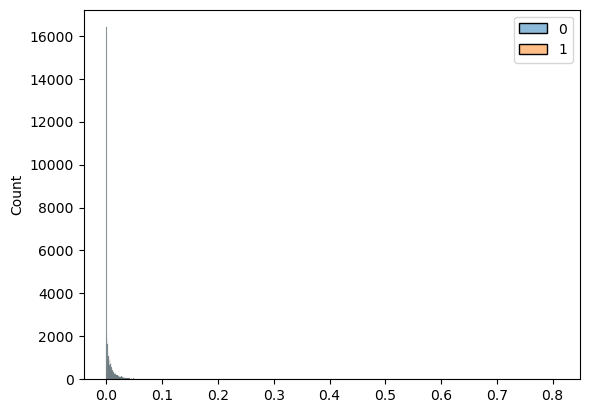

In [76]:
sns.histplot(fst)

In [69]:
g = allel.GenotypeArray(geno_array)

In [70]:
import allel
import numpy as np
import pandas as pd

# Assuming you have a genotype array `g` and a list of subpopulations `subpops`
# g is a 3D array of shape (n_variants, n_samples, ploidy)
# subpops is a list where each element is a list of indices for individuals in that population

# Initialize a matrix to store the pairwise FST values
n_pops = len(subpops)
fst_matrix = np.zeros((n_pops, n_pops))

# Loop over all pairs of populations
for i in range(n_pops):
    for j in range(i + 1, n_pops):
        # Get the allele counts for the two populations
        ac1 = g.count_alleles(subpop=subpops[i])
        ac2 = g.count_alleles(subpop=subpops[j])

        # Calculate Weir & Cockerham's FST between the two populations
        num, den = allel.hudson_fst(ac1, ac2)
        fst_value = np.sum(num) / np.sum(den)
        
        # Store the FST value in the matrix
        fst_matrix[i, j] = fst_value
        fst_matrix[j, i] = fst_value  # Symmetric matrix

# Convert the matrix to a DataFrame for better readability
fst_df = pd.DataFrame(fst_matrix, columns=[f'pop{i}' for i in range(n_pops)], index=[f'pop{i}' for i in range(n_pops)])


           pop0      pop1      pop2      pop3      pop4      pop5      pop6  \
pop0   0.000000  0.003294  0.010372  0.016508  0.018781  0.022008  0.022514   
pop1   0.003294  0.000000  0.004828  0.011113  0.014350  0.017880  0.018746   
pop2   0.010372  0.004828  0.000000  0.005417  0.008777  0.012602  0.015688   
pop3   0.016508  0.011113  0.005417  0.000000  0.003386  0.007787  0.010461   
pop4   0.018781  0.014350  0.008777  0.003386  0.000000  0.003820  0.007228   
pop5   0.022008  0.017880  0.012602  0.007787  0.003820  0.000000  0.004306   
pop6   0.022514  0.018746  0.015688  0.010461  0.007228  0.004306  0.000000   
pop7   0.027214  0.025206  0.022225  0.016676  0.015740  0.012310  0.006377   
pop8   0.033715  0.032348  0.029396  0.025400  0.024831  0.022106  0.016898   
pop9   0.046446  0.044179  0.040365  0.036178  0.036981  0.035407  0.030398   
pop10  0.060152  0.057760  0.053239  0.049939  0.050564  0.048629  0.044220   
pop11  0.061476  0.058960  0.054428  0.051441  0.052

<Axes: >

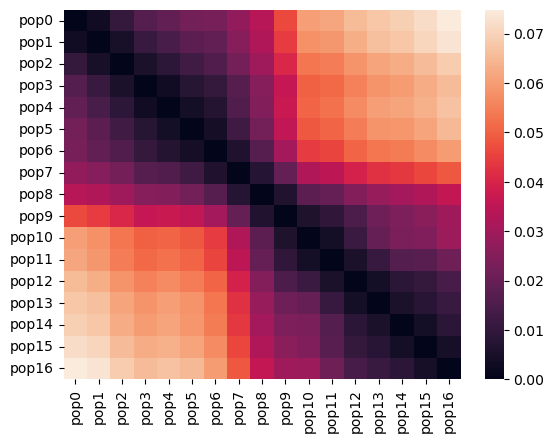

In [73]:
sns.heatmap(fst_df)

In [64]:
fst = np.sum(a) / (np.sum(a) + np.sum(b) + np.sum(c))

In [65]:
fst

0.03373653763001324

In [58]:
total_pop_size

8500

In [26]:
57391 - 55073

2318

In [ ]:
geno_array = geno_array[inverted_mask]

# Access genotypes (assuming diploid data)
genotypes = allel.GenotypeArray(geno_array)

# Calculate allele counts
ac = genotypes.count_alleles()

In [33]:
ac

<AlleleCountsArray shape=(55073, 2) dtype=int32>
16995     5
16996     4
16800   200
...
16999     1
16999     1
 7832  9168

In [41]:
mean_pairwise_difference = allel.mean_pairwise_difference(ac)

In [42]:
np.sum(mean_pairwise_difference)

2000.2060345971909

In [43]:
# Step 2: Sum the mean pairwise differences
total_mpd = np.sum(mean_pairwise_difference)

# Step 3: Normalize by the total number of accessible bases
# Assuming you know the total number of accessible bases in your genome/region
# Replace `total_accessible_bases` with the actual number
 # Example: 100 million bases
genome_wide_pi = total_mpd / len(pos)

In [45]:
mean_pairwise_difference

array([5.88096878e-04, 4.70505185e-04, 2.32539630e-02, ...,
       1.17647059e-04, 1.17647059e-04, 4.96941176e-01])

In [47]:
import seaborn as sns

<Axes: ylabel='Count'>

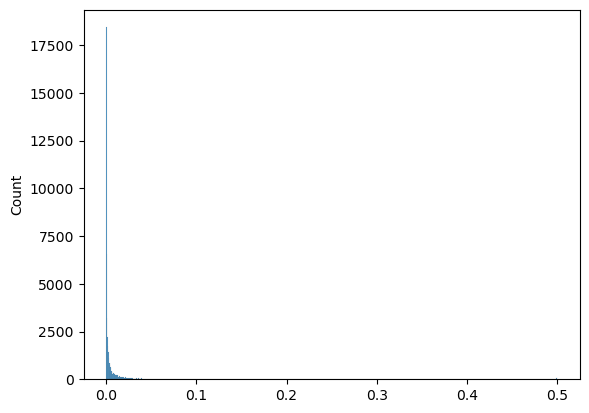

In [48]:
sns.histplot(mean_pairwise_difference)

In [44]:
genome_wide_pi

0.036319176994120364

In [35]:
mean_pairwise_difference

array([5.88096878e-04, 4.70505185e-04, 2.32539630e-02, ...,
       1.17647059e-04, 1.17647059e-04, 4.96941176e-01])

In [21]:
pos = [2, 4, 7, 14, 15, 18, 19, 25, 27]
pi = allel.sequence_diversity(pos, ac, start=1, stop=31)

In [22]:
pi

0.010796971537448404

In [18]:

# Calculate nucleotide diversity (π) per variant
allel.sequence_diversity(ac = ac, start=0, stop=None)

TypeError: sequence_diversity() missing 1 required positional argument: 'pos'

In [ ]:


# Calculate average nucleotide diversity across the genome
average_pi = np.mean(pi_per_variant)

print('Average nucleotide diversity (π):', average_pi)

In [308]:
mut_times = []
for mut in ts.tables.mutations:
    mut_times.append(mut.time)

In [309]:
pd.Series(mut_times).sort_values()

52152       0.000015
9099        0.000018
9523        0.000027
45550       0.000037
45740       0.000161
            ...     
5541     2207.359542
34237    2439.330918
49151    2585.431263
2376     2595.638135
31799    3568.508010
Length: 53117, dtype: float64

In [294]:
pd.Series(mut_times).sort_values()

41029       0.000252
14508       0.000696
27551       0.000708
18287       0.001003
36002       0.001334
            ...     
17590    2454.744742
26613    2457.748901
40107    2529.378053
36734    2633.037327
24129    2757.918537
Length: 42590, dtype: float64

In [56]:
sites_table = ts.tables.sites

# Print the ancestral state of all mutations
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        index_causal_pos = index
        print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

## now there is an ancestral state 
mutations_table = ts.tables.mutations

# Print the ancestral state of all mutations
for index, mut in enumerate(mutations_table):
    if mut.site == index_causal_pos:
        print(mut)
        #print(mut)
        #print(mut)
        #print(index)
        pick_as_ancestral = mut.derived_state
        ##print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

Position: 15005.0, Ancestral State: 
MutationTableRow(site=1223, node=632233, derived_state='0', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1223, node=632233, derived_state='1', parent=1268, metadata={'mutation_list': [{'mutation_type': 2, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1223, node=632233, derived_state='0', parent=1269, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1223, node=632255, derived_state='0', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1223, node=632256, derived_state='0', parent=-1, metadata={'mutation_list': [{'mutati

In [57]:
def generate_nucleotides_until_diverse(ts, causal_pos):
    all_same = True
    while all_same:
        print(all_same)
        # Generate nucleotides
        nts = pyslim.generate_nucleotides(ts)
        nts = pyslim.convert_alleles(nts)
        
        # Get the sites table
        sites_table = nts.tables.sites

        # Find the index of the site at the causal position
        index_causal_pos = None
        for index, site in enumerate(sites_table):
            if site.position == causal_pos:
                index_causal_pos = index
                break

        if index_causal_pos is None:
            raise ValueError(f"Site at position {causal_pos} not found.")

        # Get the derived states at the causal position
        derived_states = []
        mutations_table = nts.tables.mutations
        for mut in mutations_table:
            if mut.site == index_causal_pos:
                derived_states.append(mut.derived_state)

        # Check if all derived states are the same
        all_same = (pd.Series(derived_states) == derived_states[0]).all()

    # Return the nts once we have diverse derived states
    return nts, derived_states

# Call the function with your time series and causal position
nts, derived_states = generate_nucleotides_until_diverse(ts, causal_pos)

True


In [58]:
sites_table = nts.tables.sites

# Print the ancestral state of all mutations
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        index_causal_pos = index
        print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

## now there is an ancestral state 
mutations_table = nts.tables.mutations

# Print the ancestral state of all mutations
for index, mut in enumerate(mutations_table):
    if mut.site == index_causal_pos:
        #print(mut)
        #print(mut)
        #print(index)
        pick_as_ancestral = mut.derived_state
        ##print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

Position: 15005.0, Ancestral State: T


In [59]:
## assign the ancestral sites to one of the 2 mutations 0 or 1 
sites_table = nts.tables.sites
# Create a new site table to hold the modified entries
new_sites_table = tskit.SiteTable()

# Iterate through the existing sites, modify the ancestral state, and add them to the new table
for site in sites_table:
    # Modify the ancestral state here; e.g., changing it to '0'
    new_sites_table.add_row(
        position=site.position,
        ancestral_state= pick_as_ancestral, 
        metadata=site.metadata
    )

tables = nts.dump_tables()
tables.sites.replace_with(new_sites_table)
# Now you can save the modified tree sequence
nts = tables.tree_sequence()

In [60]:
sites_table = nts.tables.sites

# Print the ancestral state of all mutations
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        index_causal_pos = index
        print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

## now there is an ancestral state 
mutations_table = nts.tables.mutations

# Print the ancestral state of all mutations
for index, mut in enumerate(mutations_table):
    if mut.site == index_causal_pos:
        print(mut)
        #print(mut)
        #print(mut)
        #print(index)
        ##print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

Position: 15005.0, Ancestral State: T
MutationTableRow(site=1223, node=632233, derived_state='C', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 1}]}, time=200.0)
MutationTableRow(site=1223, node=632233, derived_state='T', parent=1268, metadata={'mutation_list': [{'mutation_type': 2, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 3}]}, time=200.0)
MutationTableRow(site=1223, node=632233, derived_state='C', parent=1269, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 1}]}, time=200.0)
MutationTableRow(site=1223, node=632255, derived_state='C', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 1}]}, time=200.0)
MutationTableRow(site=1223, node=632256, derived_state='C', parent=-1, metadata={'mutation_list': [{'mutation_

In [61]:
# Identify multiallelic sites
multiallelic_sites = set()
invariant_sites = set()

for site in nts.sites():
    alleles = set()
    for mutation in site.mutations:
        alleles.add(mutation.derived_state)

    if len(alleles) > 2:  # Multiallelic site
        #print(site)
        multiallelic_sites.add(site.id)

    elif len(alleles) == 0:
        print('invariant site')
        invariant_sites.add(site.id)

# Filter out the multiallelic sites
def site_is_biallelic(site):
    return site.id not in multiallelic_sites

filtered_ts = nts.delete_sites(
    [site.id for site in nts.sites() if site.id in multiallelic_sites]
)


In [62]:
multiallelic_sites

{2772,
 4151,
 4579,
 5361,
 5765,
 12631,
 13974,
 14136,
 17823,
 22104,
 29193,
 34079,
 37280,
 37958}

In [63]:
# Write the filtered tree sequence to a VCF file
name_vcf = f"results/vcfs/vcf_w_neutral_mutid_{runid}.vcf"
with open(name_vcf, 'w') as file:
    # Pass the file object as the output parameter
    filtered_ts.write_vcf(output=file) #allow_position_zero = True)


(40663, 9)


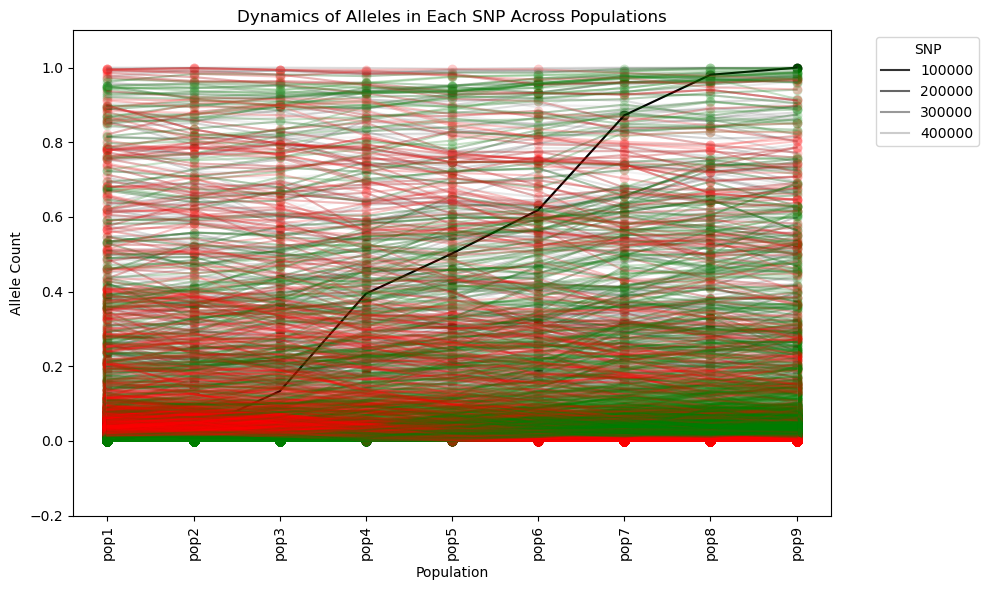

In [69]:


population_counts = {pop.id: 0 for pop in nts.populations()}

for ind in nts.individuals():
    # Each individual has a population
    pop_id = ind.population
    population_counts[pop_id] += 1

# Save the dictionary as a pickle file
with open(f'results/pop_counts/population_counts_{runid}.pkl', 'wb') as file:
    pickle.dump(population_counts, file)

total_pop_size = sum(population_counts.values())

vcf_file = f'results/vcfs/vcf_w_neutral_mutid_{runid}.vcf'
vcf = allel.read_vcf(vcf_file)
samples = vcf['samples']
geno_array = vcf['calldata/GT']
pos = vcf['variants/POS']
chrom = vcf['variants/CHROM']

## delete all the sites with thwo alternative loci 

mask = np.any(geno_array == 2, axis=(1, 2))
# Invert the mask to select the entries that do NOT have a '2'
inverted_mask = ~mask
# Use the mask to filter out the entries with at least one '2'
geno_array = geno_array[inverted_mask]
pos = pos[inverted_mask]

# Check if the geno_array has enough individuals
assert geno_array.shape[1] >= total_pop_size, "geno_array does not have enough individuals."

# Initialize variables to keep track of slicing
subpops = {}
current_position = 0

# Slice the geno_array into subpopulations based on population_counts
for pop_id, pop_size in population_counts.items():
    if pop_size > 0:  # Only consider populations with non-zero size
        start = current_position
        end = start + pop_size
        subpops[f'pop{pop_id}'] = geno_array[:, start:end, :]
        current_position = end

all_alt_allele_count = {}
all_alt_allele_freq = {}
col_names = []
col_todel = []
#for order, pop in enumerate([pop1, pop2, pop3, pop3]):
for pop_name, pop in subpops.items():
    if pop.shape[1] > 0 :
        total_alleles = pop.shape[1] * 2 
        alt_count = pop.sum(axis=2).sum(axis=1)
        alt_freq = alt_count / total_alleles
        #alt_freq = alt_freq.round(4)
        #chrom_pos = pd.Series(chrom.astype(str)) + '_' +  pd.Series(pos.astype(str))
        col_names.append('chrom_pos' + pop_name)
        col_todel.append('chrom_pos' + pop_name)
        col_names.append(pop_name)
        alt_allele_count = pd.DataFrame(data = {'chrom_pos': pos, pop_name: alt_count})
        all_alt_allele_count[pop_name] = alt_allele_count
        alt_allele_freq = pd.DataFrame(data = {'chrom_pos': pos, pop_name: alt_freq})    
        all_alt_allele_freq[pop_name] = alt_allele_freq


all_alt_allele_freq = pd.concat(all_alt_allele_freq,axis=1)
all_alt_allele_count = pd.concat(all_alt_allele_count,axis=1)

all_alt_allele_freq.columns = col_names 
all_alt_allele_count.columns = col_names 

og_positions = all_alt_allele_count[col_todel[0]]
og_positions_dict = og_positions.to_dict()

all_alt_allele_freq = all_alt_allele_freq.drop(col_todel,axis=1)
all_alt_allele_count = all_alt_allele_count.drop(col_todel,axis=1)

all_alt_allele_count.index = all_alt_allele_count.index.map(og_positions_dict)
all_alt_allele_freq.index = all_alt_allele_freq.index.map(og_positions_dict)

all_alt_allele_count.to_csv(f'results/alleles_df/all_alt_allele_count_{runid}.csv')
all_alt_allele_count.to_csv(f'results/alleles_df/all_alt_allele_freq_{runid}.csv')

total_genomes = geno_array.shape[1]*2

total_genomes
min_freq = 0.01
min_count = total_genomes * min_freq

print(all_alt_allele_count.shape)
all_alt_allele_freq = all_alt_allele_freq[all_alt_allele_count.sum(axis=1) > min_count]

#sample_counts = all_alt_allele_freq.sample(100)
sample_counts = all_alt_allele_freq.copy()

sample_counts = sample_counts.reset_index() #.reset_index()
# Melt the DataFrame to long format
long_df = sample_counts.melt(id_vars=['index'], var_name='Population', value_name='Allele_Count')

# Rename 'index' to 'SNP'
long_df.rename(columns={'index': 'SNP'}, inplace=True)

results = []

# Run linear models for each SNP
for snp in long_df['SNP'].unique():
    snp_data = long_df[long_df['SNP'] == snp]
    X = sm.add_constant(snp_data['Population'].str.extract('(\d+)$').astype(int))  # Extract numeric part of population names
    y = snp_data['Allele_Count']
    model = sm.OLS(y, X).fit()
    slope = model.params[0]
    p_value = model.pvalues[0]
    results.append((snp, slope, p_value))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['SNP', 'Slope', 'P_Value'])

# Determine significance and assign colors
alpha = 0.05
results_df['Color'] = np.where((results_df['P_Value'] < alpha) & (results_df['Slope'] > 0), 'green', 
                               np.where((results_df['P_Value'] < alpha) & (results_df['Slope'] < 0), 'red', 'blue'))


results_df.to_csv(f'results/snps_w_clines/snps_w_clines_{runid}.csv')

# Plot the dynamics of alleles for each SNP across populations
plt.figure(figsize=(10, 6))
sns.lineplot(data=long_df, x='Population', y='Allele_Count', hue='SNP', palette='gray', alpha = 0.2)

# Overlay significant SNPs
for _, row in results_df.iterrows():
    if row['Color'] in ['green', 'red']:
        if row['SNP'] != 15005:
            snp_data = long_df[long_df['SNP'] == row['SNP']]
            line = sns.lineplot(data=snp_data, x='Population', y='Allele_Count', color=row['Color'], alpha=0.2)
            sns.scatterplot(data=snp_data, x='Population', y='Allele_Count',  s = 50, color=row['Color'], edgecolor=row['Color'], linewidth = 0, alpha=0.2)

        if row['SNP'] == 15005:
            snp_data = long_df[long_df['SNP'] == row['SNP']]
            line = sns.lineplot(data=snp_data, x='Population', y='Allele_Count', color='Black')
            sns.scatterplot(data=snp_data, x='Population', y='Allele_Count',  s = 50, color='Black', edgecolor='Black', linewidth = 0)

plt.title('Dynamics of Alleles in Each SNP Across Populations')
plt.xlabel('Population')
plt.ylabel('Allele Count')
plt.ylim(-0.2, 1.1)
plt.legend(title='SNP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.savefig(f'results/plots_af/allele_freq_runid{runid}.png')
plt.show()

In [334]:
# Initialize lists to store the filtered data
filtered_mutations = []
filtered_sites = []

# Go through each mutation in the tree sequence
for mut in output_slim_tree.mutations():
    # Check if the mutation list is empty
    if len(mut.metadata['mutation_list']) > 0:
        # Add to the list if the mutation list is not empty
        filtered_mutations.append(mut)

# Build the new mutation table with only the filtered mutations
tables = output_slim_tree.dump_tables()
tables.mutations.clear()

for mut in filtered_mutations:
    tables.mutations.append(mut)

# Build the new tree sequence
filtered_ts = tables.tree_sequence()

LibraryError: Parent mutation refers to itself. (TSK_ERR_MUTATION_PARENT_EQUAL)

In [338]:
new_mutation_ids = {}
new_mutations = []

for i, mut in enumerate(output_slim_tree.mutations()):
    if len(mut.metadata['mutation_list']) > 0:
        new_mutation_ids[i] = len(new_mutations)
        new_mutations.append(mut)

# Clear the existing mutation table
tables.mutations.clear()

for mut in new_mutations:
    parent_id = mut.parent
    if parent_id != tskit.NULL and parent_id in new_mutation_ids:
        parent_id = new_mutation_ids[parent_id]
    else:
        parent_id = tskit.NULL
    
    tables.mutations.add_row(
        site=mut.site,
        node=mut.node,
        derived_state=mut.derived_state,
        parent=parent_id,
        metadata=mut.metadata
    )

In [339]:
filtered_ts = tables.tree_sequence()


In [340]:
filtered_ts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,665969,nan,0,-1,{'mutation_list': [{'mutation_type': ...
1,0,665969,nan,1,-1,{'mutation_list': [{'mutation_type': ...
2,0,665969,nan,0,-1,{'mutation_list': [{'mutation_type': ...
3,0,665971,nan,0,-1,{'mutation_list': [{'mutation_type': ...
4,0,665976,nan,0,-1,{'mutation_list': [{'mutation_type': ...
5,0,665992,nan,0,-1,{'mutation_list': [{'mutation_type': ...
6,0,665995,nan,0,-1,{'mutation_list': [{'mutation_type': ...
7,0,666013,nan,0,-1,{'mutation_list': [{'mutation_type': ...
8,0,666023,nan,0,-1,{'mutation_list': [{'mutation_type': ...
9,0,666037,nan,0,-1,{'mutation_list': [{'mutation_type': ...


In [327]:
for mut in output_slim_tree.tables.mutations:
    if len(mut.metadata['mutation_list']) < 1:
        print(mut)

MutationTableRow(site=0, node=665969, derived_state='', parent=0, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=0, node=665969, derived_state='', parent=2, metadata={'mutation_list': []}, time=200.0)


In [320]:
for mut in output_slim_tree.tables.mutations:
    if len(mut.metadata['mutation_list'][0]) < 2: 
        print(mut)

IndexError: list index out of range

In [321]:
for mut in output_slim_tree.mutations():
    if len(mut.metadata['mutation_list'][0]) < 2: 
        print(mut)

IndexError: list index out of range

In [314]:
output_slim_tree.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,665969,200,0,-1,{'mutation_list': [{'mutation_type': ...
1,0,665969,200,,0,{'mutation_list': []}
2,0,665969,200,1,1,{'mutation_list': [{'mutation_type': ...
3,0,665969,200,,2,{'mutation_list': []}
4,0,665969,200,0,3,{'mutation_list': [{'mutation_type': ...
5,0,665971,200,0,-1,{'mutation_list': [{'mutation_type': ...
6,0,665976,200,0,-1,{'mutation_list': [{'mutation_type': ...
7,0,665992,200,0,-1,{'mutation_list': [{'mutation_type': ...
8,0,665995,200,0,-1,{'mutation_list': [{'mutation_type': ...
9,0,666013,200,0,-1,{'mutation_list': [{'mutation_type': ...


In [312]:
sites_table = output_slim_tree.tables.sites

# Print the ancestral state of all mutations
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        index_causal_pos = index
        print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

## now there is an ancestral state 
mutations_table = output_slim_tree.tables.mutations

# Print the ancestral state of all mutations
for index, mut in enumerate(mutations_table):
    if mut.site == index_causal_pos:
        print(mut)
        #print(mut)
        #print(mut)
        #print(index)
        pick_as_ancestral = mut.derived_state
        ##print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

Position: 15005.0, Ancestral State: 
MutationTableRow(site=0, node=665969, derived_state='0', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=0, node=665969, derived_state='', parent=0, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=0, node=665969, derived_state='1', parent=1, metadata={'mutation_list': [{'mutation_type': 2, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=0, node=665969, derived_state='', parent=2, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=0, node=665969, derived_state='0', parent=3, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=0, node=665971, derived_state='0', parent=-1, metadata={'mutation_list': [{'mutation_type': 1

In [ ]:
pop_names = []
for pops in output_slim_tree.tables.populations:
    if pops.metadata is not None:
        # Decode the metadata (assuming it's stored as JSON by SLiM)
        pop_names.append(pops.metadata['name'])

# Create the demography from the tree sequence
demography = msprime.Demography.from_tree_sequence(output_slim_tree)

# Set the initial size for pop_0
for pop in demography.populations:
    if pop.name == "pop_0":
        pop.initial_size = 200

# Add migration rates using population indices
subpop_number = len(pop_names)
for i in range(1, subpop_number):
    # Set migration rate from subpop i to subpop i+1
    demography.set_migration_rate(source=i, dest=i + 1, rate=migration_rate)
    
    # Set migration rate from subpop i+1 to subpop i (bi-directional)
    demography.set_migration_rate(source=i + 1, dest=i, rate=migration_rate)

rts = pyslim.recapitate(output_slim_tree,
            recombination_rate=3e-6,
            demography=demography,
            #ancestral_Ne=200, 
            random_seed=5)

In [292]:
next_id = pyslim.next_slim_mutation_id(rts)
ts = msprime.sim_mutations(
           rts,
           rate=mutrate,
           model=msprime.SLiMMutationModel(type=0, next_id=next_id),
           keep=True,
)
print(f"The tree sequence now has {ts.num_mutations} mutations,\n"
      f"and mean pairwise nucleotide diversity is {ts.diversity():0.3e}.")

genetic_diversity = ts.diversity()
print("Av. genetic diversity across the genome is", genetic_diversity)

The tree sequence now has 44641 mutations,
and mean pairwise nucleotide diversity is 1.178e-03.
Av. genetic diversity across the genome is 0.0011778982813606688


In [308]:
sites_table = ts.tables.sites

# Print the ancestral state of all mutations
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        index_causal_pos = index
        print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

## now there is an ancestral state 
mutations_table = ts.tables.mutations

# Print the ancestral state of all mutations
for index, mut in enumerate(mutations_table):
    if mut.site == index_causal_pos:
        print(mut)
        #print(mut)
        #print(mut)
        #print(index)
        pick_as_ancestral = mut.derived_state
        ##print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

Position: 15005.0, Ancestral State: 
MutationTableRow(site=1307, node=665969, derived_state='0', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='', parent=1370, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='1', parent=1371, metadata={'mutation_list': [{'mutation_type': 2, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='', parent=1372, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='0', parent=1373, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': -1}]}, time=200.0)
MutationTableRow(site=1307, node=665971, derived_state='0', parent=-1, metadata={'mutati

In [303]:
def generate_alleles(nts):
    ## create my own generate_alleles because the pyslim function was giving me troubles 
    tables = nts.dump_tables()
    ## make sure there is a reference sequence 
    has_refseq = (
        nts.has_reference_sequence()
        and len(nts.reference_sequence.data) > 0
    )
    if not has_refseq:
        raise ValueError("Tree sequence must have a valid reference sequence.")
    
    ## create a nuc_ids just with -1 
    nuc_inds = np.full(nts.tables.mutations.num_rows, -1, dtype=int)
    
    ## now replace for each mutation its real nucleotide 
    ## this is the aprt that was not wokring in pyslim and I am just doing manually 
    for k, mut in enumerate(nts.mutations()):
        if 'mutation_list' in mut.metadata and len(mut.metadata['mutation_list']) > 0:
            # Check if the first mutation in the list has a valid nucleotide value
            nucleotide = mut.metadata['mutation_list'][0].get('nucleotide', -1)
            if nucleotide != -1:
                nuc_inds[k] = nucleotide
    
    
    ## some posiiotns somehow keep being -1 so replace them manually by random numbers in between 0 and 3
    
    weird_posiitons_without_nucl = np.where(nuc_inds == -1)
    size = len(weird_posiitons_without_nucl[0])
    nucleotides_values = np.array([2, 3, 1, 0])
    # Randomly pick 2 values from the array
    random_picks = np.random.choice(nucleotides_values, size=size, replace=False)
    indices_to_replace = np.where(nuc_inds == -1)[0]
    nuc_inds[indices_to_replace] = random_picks
    
    ## this part corrects stacked mutations 
    num_stacked = np.array([len(m.metadata['mutation_list']) for m in nts.mutations()])
    ## if there are more than 1 stacked mutations 
    for k in np.where(num_stacked > 1)[0]:
        mut = nts.mutation(k)
        if mut.parent == tskit.NULL:
            print('this is true')
            pids = []
        else:
            pids = ts.mutation(mut.parent).derived_state.split(",")
        x = [
            (
                md['slim_time'],
                i not in pids,
                int(i),
                j
            ) for j, (i, md) in
            enumerate(
                zip(mut.derived_state.split(","), mut.metadata['mutation_list'])
            )
        ]
        x.sort()
        j = x[-1][3]
        nuc_inds[k] = mut.metadata['mutation_list'][j]['nucleotide']

    ## check that all mutaitons have been fixed 
    if np.any(nuc_inds == -1):
        raise ValueError("All mutations must be nucleotide mutations.")
    da = np.array(NUCLEOTIDES)[nuc_inds]
    tables.mutations.packset_derived_state(da)
    k = tables.sites.position.astype('int')
    aa = np.frombuffer(nts.reference_sequence.data.encode('utf-8'), dtype='S1')[k]
    tables.sites.packset_ancestral_state(aa.tobytes().decode('utf-8'))
    ## return the tree seq with alleles 
    return tables.tree_sequence()

In [304]:
def generate_nucleotides_until_diverse(ts, causal_pos):
    all_same = True
    while all_same:
        print(all_same)
        # Generate nucleotides
        nts = pyslim.generate_nucleotides(ts)
        nts = generate_alleles(nts)
        
        # Get the sites table
        sites_table = nts.tables.sites

        # Find the index of the site at the causal position
        index_causal_pos = None
        for index, site in enumerate(sites_table):
            if site.position == causal_pos:
                index_causal_pos = index
                break

        if index_causal_pos is None:
            raise ValueError(f"Site at position {causal_pos} not found.")

        # Get the derived states at the causal position
        derived_states = []
        mutations_table = nts.tables.mutations
        for mut in mutations_table:
            if mut.site == index_causal_pos:
                derived_states.append(mut.derived_state)

        # Check if all derived states are the same
        all_same = (pd.Series(derived_states) == derived_states[0]).all()

    # Return the nts once we have diverse derived states
    return nts, derived_states

In [305]:
nts, derived_states = generate_nucleotides_until_diverse(ts, causal_pos)

True


In [306]:
sites_table = nts.tables.sites

# Print the ancestral state of all mutations
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        index_causal_pos = index
        print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

## now there is an ancestral state 
mutations_table = nts.tables.mutations

# Print the ancestral state of all mutations
for index, mut in enumerate(mutations_table):
    if mut.site == index_causal_pos:
        print(mut)
        #print(mut)
        #print(mut)
        #print(index)
        pick_as_ancestral = mut.derived_state
        ##print(f"Position: {site.position}, Ancestral State: {site.ancestral_state}")

Position: 15005.0, Ancestral State: T
MutationTableRow(site=1307, node=665969, derived_state='A', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 0}]}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='C', parent=1370, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='T', parent=1371, metadata={'mutation_list': [{'mutation_type': 2, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 3}]}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='G', parent=1372, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='A', parent=1373, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 0}]}, time=200.0)
MutationTableRow(site=1307, node=665971, derived_state='A', parent=-1, metadata={'mutati

In [300]:
## assign the ancestral sites to one of the 2 mutations 0 or 1 
sites_table = nts.tables.sites
# Create a new site table to hold the modified entries
new_sites_table = tskit.SiteTable()

# Iterate through the existing sites, modify the ancestral state, and add them to the new table
for site in sites_table:
    # Modify the ancestral state here; e.g., changing it to '0'
    new_sites_table.add_row(
        position=site.position,
        ancestral_state= pick_as_ancestral, 
        metadata=site.metadata
    )

tables = nts.dump_tables()
tables.sites.replace_with(new_sites_table)
# Now you can save the modified tree sequence
nts = tables.tree_sequence()

In [301]:
nts

In [302]:
sites_table = ts.tables.sites
for index, site in enumerate(sites_table):
    if site.position == causal_pos:
        print(site)
        index_causal_pos = index
        break

if index_causal_pos is None:
    raise ValueError(f"Site at position {causal_pos} not found.")

# Get the derived states at the causal position
derived_states = []
mutations_table = nts.tables.mutations
for mut in mutations_table:
    if mut.site == index_causal_pos:
        print(mut)

SiteTableRow(position=15005.0, ancestral_state='', metadata=b'')
MutationTableRow(site=1307, node=665969, derived_state='T', parent=-1, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 3}]}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='C', parent=1370, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='A', parent=1371, metadata={'mutation_list': [{'mutation_type': 2, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 0}]}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='G', parent=1372, metadata={'mutation_list': []}, time=200.0)
MutationTableRow(site=1307, node=665969, derived_state='T', parent=1373, metadata={'mutation_list': [{'mutation_type': 1, 'selection_coeff': 0.0, 'subpopulation': 0, 'slim_time': 1, 'nucleotide': 3}]}, time=200.0)
MutationTableRow(site=1307, node=665971, derived_state='T', p

In [ ]:



# Identify multiallelic sites
multiallelic_sites = set()
invariant_sites = set()

for site in nts.sites():
    alleles = set()
    for mutation in site.mutations:
        alleles.add(mutation.derived_state)

    if len(alleles) > 2:  # Multiallelic site
        #print(site)
        multiallelic_sites.add(site.id)

    elif len(alleles) == 0:
        print('invariant site')
        invariant_sites.add(site.id)

# Filter out the multiallelic sites
def site_is_biallelic(site):
    return site.id not in multiallelic_sites

filtered_ts = nts.delete_sites(
    [site.id for site in nts.sites() if site.id in multiallelic_sites]
)

In [284]:





# Write the filtered tree sequence to a VCF file
name_vcf = f"vcf_w_neutral_mutid_{runid}.vcf"
with open(name_vcf, 'w') as file:
    # Pass the file object as the output parameter
    filtered_ts.write_vcf(output=file) #allow_position_zero = True)


population_counts = {pop.id: 0 for pop in nts.populations()}

for ind in nts.individuals():
    # Each individual has a population
    pop_id = ind.population
    population_counts[pop_id] += 1

total_pop_size = sum(population_counts.values())

vcf_file = f'vcf_w_neutral_mutid_{runid}.vcf'
vcf = allel.read_vcf(vcf_file)
samples = vcf['samples']
geno_array = vcf['calldata/GT']
pos = vcf['variants/POS']
chrom = vcf['variants/CHROM']

## delete all the sites with thwo alternative loci 

mask = np.any(geno_array == 2, axis=(1, 2))
# Invert the mask to select the entries that do NOT have a '2'
inverted_mask = ~mask
# Use the mask to filter out the entries with at least one '2'
geno_array = geno_array[inverted_mask]
pos = pos[inverted_mask]

# Check if the geno_array has enough individuals
assert geno_array.shape[1] >= total_pop_size, "geno_array does not have enough individuals."

# Initialize variables to keep track of slicing
subpops = {}
current_position = 0

# Slice the geno_array into subpopulations based on population_counts
for pop_id, pop_size in population_counts.items():
    if pop_size > 0:  # Only consider populations with non-zero size
        start = current_position
        end = start + pop_size
        subpops[f'pop{pop_id}'] = geno_array[:, start:end, :]
        current_position = end

all_alt_allele_count = {}
all_alt_allele_freq = {}
col_names = []
col_todel = []
#for order, pop in enumerate([pop1, pop2, pop3, pop3]):
for pop_name, pop in subpops.items():
    if pop.shape[1] > 0 :
        total_alleles = pop.shape[1] * 2 
        alt_count = pop.sum(axis=2).sum(axis=1)
        alt_freq = alt_count / total_alleles
        #alt_freq = alt_freq.round(4)
        #chrom_pos = pd.Series(chrom.astype(str)) + '_' +  pd.Series(pos.astype(str))
        col_names.append('chrom_pos' + pop_name)
        col_todel.append('chrom_pos' + pop_name)
        col_names.append(pop_name)
        alt_allele_count = pd.DataFrame(data = {'chrom_pos': pos, pop_name: alt_count})
        all_alt_allele_count[pop_name] = alt_allele_count
        alt_allele_freq = pd.DataFrame(data = {'chrom_pos': pos, pop_name: alt_freq})    
        all_alt_allele_freq[pop_name] = alt_allele_freq


all_alt_allele_freq = pd.concat(all_alt_allele_freq,axis=1)
all_alt_allele_count = pd.concat(all_alt_allele_count,axis=1)

all_alt_allele_freq.columns = col_names 
all_alt_allele_count.columns = col_names 

og_positions = all_alt_allele_count[col_todel[0]]
og_positions_dict = og_positions.to_dict()

all_alt_allele_freq = all_alt_allele_freq.drop(col_todel,axis=1)
all_alt_allele_count = all_alt_allele_count.drop(col_todel,axis=1)

all_alt_allele_count.index = all_alt_allele_count.index.map(og_positions_dict)
all_alt_allele_freq.index = all_alt_allele_freq.index.map(og_positions_dict)

all_alt_allele_count.to_csv(f'results/all_alt_allele_count_{runid}.csv')
all_alt_allele_count.to_csv(f'results/all_alt_allele_freq_{runid}.csv')

In [285]:
vcf_file = f'vcf_w_neutral_mutid_{runid}.vcf'
vcf = allel.read_vcf(vcf_file)
samples = vcf['samples']
geno_array = vcf['calldata/GT']
pos = vcf['variants/POS']

In [287]:
15005 in pos

False

In [271]:
15005 in pos

False

In [263]:
15005 in all_alt_allele_count.index

False

In [262]:
15005 in og_positions

True

In [269]:
og_positions #.loc[15005] 

0            14
1            17
2            22
3            23
4            26
          ...  
42178    499911
42179    499924
42180    499935
42181    499991
42182    499999
Name: chrom_pospop1, Length: 42183, dtype: int32

In [245]:
total_genomes = geno_array.shape[1]*2
min_freq = 0.05
min_count = total_pop_size * min_freq

print(all_alt_allele_count.shape)
all_alt_allele_freq = all_alt_allele_freq[all_alt_allele_count.sum(axis=1) > min_count]

(42183, 9)


In [246]:
all_alt_allele_freq.shape

(1229, 9)

In [247]:
#sample_counts = all_alt_allele_freq.sample(100)
sample_counts = all_alt_allele_freq.copy()

sample_counts = sample_counts.reset_index() #.reset_index()
# Melt the DataFrame to long format
long_df = sample_counts.melt(id_vars=['index'], var_name='Population', value_name='Allele_Count')

# Rename 'index' to 'SNP'
long_df.rename(columns={'index': 'SNP'}, inplace=True)

In [248]:
results = []

# Run linear models for each SNP
for snp in long_df['SNP'].unique():
    snp_data = long_df[long_df['SNP'] == snp]
    X = sm.add_constant(snp_data['Population'].str.extract('(\d+)$').astype(int))  # Extract numeric part of population names
    y = snp_data['Allele_Count']
    model = sm.OLS(y, X).fit()
    slope = model.params[0]
    p_value = model.pvalues[0]
    results.append((snp, slope, p_value))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['SNP', 'Slope', 'P_Value'])

# Determine significance and assign colors
alpha = 0.05
results_df['Color'] = np.where((results_df['P_Value'] < alpha) & (results_df['Slope'] > 0), 'green', 
                               np.where((results_df['P_Value'] < alpha) & (results_df['Slope'] < 0), 'red', 'blue'))

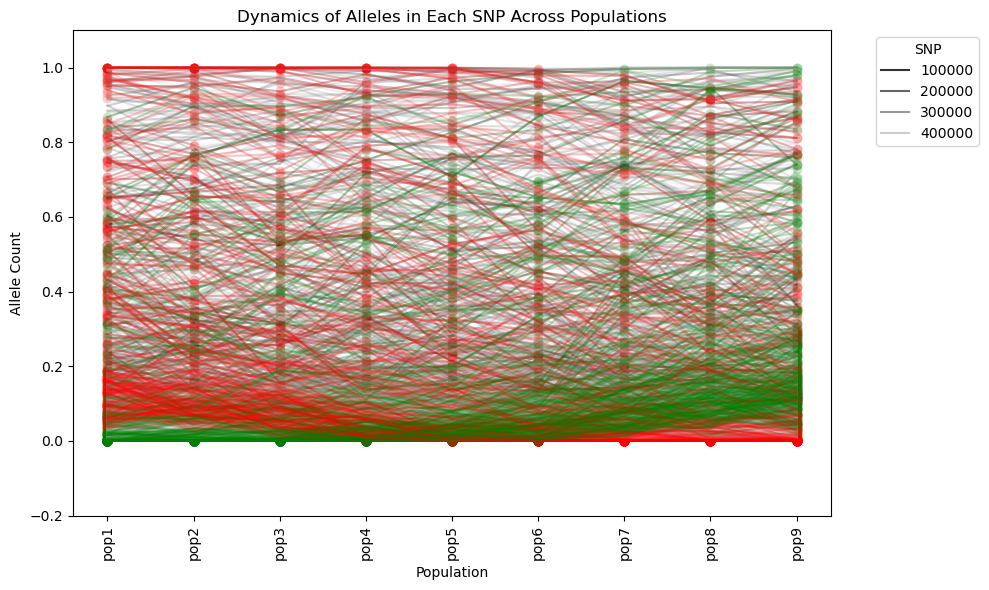

In [249]:
#sns.set_style("whitegrid", {'axes.grid' : False})

# Plot the dynamics of alleles for each SNP across populations
plt.figure(figsize=(10, 6))
sns.lineplot(data=long_df, x='Population', y='Allele_Count', hue='SNP', palette='gray', alpha = 0.2)

# Overlay significant SNPs
for _, row in results_df.iterrows():
    if row['Color'] in ['green', 'red']:
        if row['SNP'] != 15005:
            snp_data = long_df[long_df['SNP'] == row['SNP']]
            line = sns.lineplot(data=snp_data, x='Population', y='Allele_Count', color=row['Color'], alpha=0.2)
            sns.scatterplot(data=snp_data, x='Population', y='Allele_Count',  s = 50, color=row['Color'], edgecolor=row['Color'], linewidth = 0, alpha=0.2)

        if row['SNP'] == 15005:
            snp_data = long_df[long_df['SNP'] == row['SNP']]
            line = sns.lineplot(data=snp_data, x='Population', y='Allele_Count', color='Black')
            sns.scatterplot(data=snp_data, x='Population', y='Allele_Count',  s = 50, color='Black', edgecolor='Black', linewidth = 0)

plt.title('Dynamics of Alleles in Each SNP Across Populations')
plt.xlabel('Population')
plt.ylabel('Allele Count')
plt.ylim(-0.2, 1.1)
plt.legend(title='SNP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.savefig(f'allele_freq_runid{id}.png')
plt.show()

In [158]:
cline = results_df[results_df['Color'].isin(['red', 'green'])]

In [159]:
cline

,SNP,Slope,P_Value,Color
0,601,0.008564,0.000038,green
1,995,0.008804,0.000068,green
2,1027,0.012357,0.000004,green
5,2248,-0.028295,0.000087,red
6,2301,0.030543,0.000064,green
...,...,...,...,...
1271,498043,-0.013248,0.000234,red
1272,498792,0.007174,0.000025,green
1273,499162,0.019542,0.045598,green
1274,499193,-0.012064,0.001547,red
